In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("twitter_training.csv")
data.head(10)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
5,2402,Borderlands,Positive,So I spent a few hours making something for fu...
6,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
7,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
8,2402,Borderlands,Positive,So I spent a few hours making something for fu...
9,2402,Borderlands,Positive,2010 So I spent a few hours making something f...


In [3]:
data.shape

(74681, 4)

Adding column names

In [4]:
data.columns = ["ID", "Brands", "Sentiment", "Comments"]
data.columns

Index(['ID', 'Brands', 'Sentiment', 'Comments'], dtype='object')

In [5]:
data.head(10)

,ID,Brands,Sentiment,Comments
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
5,2402,Borderlands,Positive,So I spent a few hours making something for fu...
6,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
7,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
8,2402,Borderlands,Positive,So I spent a few hours making something for fu...
9,2402,Borderlands,Positive,2010 So I spent a few hours making something f...


Checking for null values

In [6]:
data.isnull().sum()

ID             0
Brands         0
Sentiment      0
Comments     686
dtype: int64

In [7]:
data.dropna(inplace=True)
# data.shape

In [8]:
data.isnull().sum()

ID           0
Brands       0
Sentiment    0
Comments     0
dtype: int64

Checking for duplicates

In [9]:
data.duplicated().sum()

2340

In [10]:
data.drop_duplicates(inplace=True)
# data.shape

In [11]:
data.duplicated().sum()

0

In [12]:
data.info()
data.describe(include=object)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71655 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         71655 non-null  int64 
 1   Brands     71655 non-null  object
 2   Sentiment  71655 non-null  object
 3   Comments   71655 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.7+ MB


,Brands,Sentiment,Comments
count,71655,71655,71655
unique,32,4,69490
top,TomClancysRainbowSix,Negative,It is not the first time that the EU Commissio...
freq,2328,21698,172


In [13]:
data["Brands"].value_counts()

TomClancysRainbowSix                 2328
Verizon                              2319
MaddenNFL                            2315
CallOfDuty                           2314
Microsoft                            2304
WorldOfCraft                         2300
NBA2K                                2299
LeagueOfLegends                      2296
TomClancysGhostRecon                 2291
Facebook                             2289
ApexLegends                          2278
johnson&johnson                      2257
Battlefield                          2255
Amazon                               2249
CallOfDutyBlackopsColdWar            2242
FIFA                                 2238
Dota2                                2225
Overwatch                            2220
Hearthstone                          2219
HomeDepot                            2216
GrandTheftAuto(GTA)                  2208
Borderlands                          2205
Xbox(Xseries)                        2201
Google                            

In [14]:
data["Sentiment"].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [15]:
arr = data["Brands"].unique()
arr
print("Total brands:", len(arr))

Total brands: 32


C:\Users\91879\AppData\Local\Temp\ipykernel_9940\1118691348.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y="Brands", data=data, order=data["Brands"].value_counts(ascending=False).index, palette="Paired")


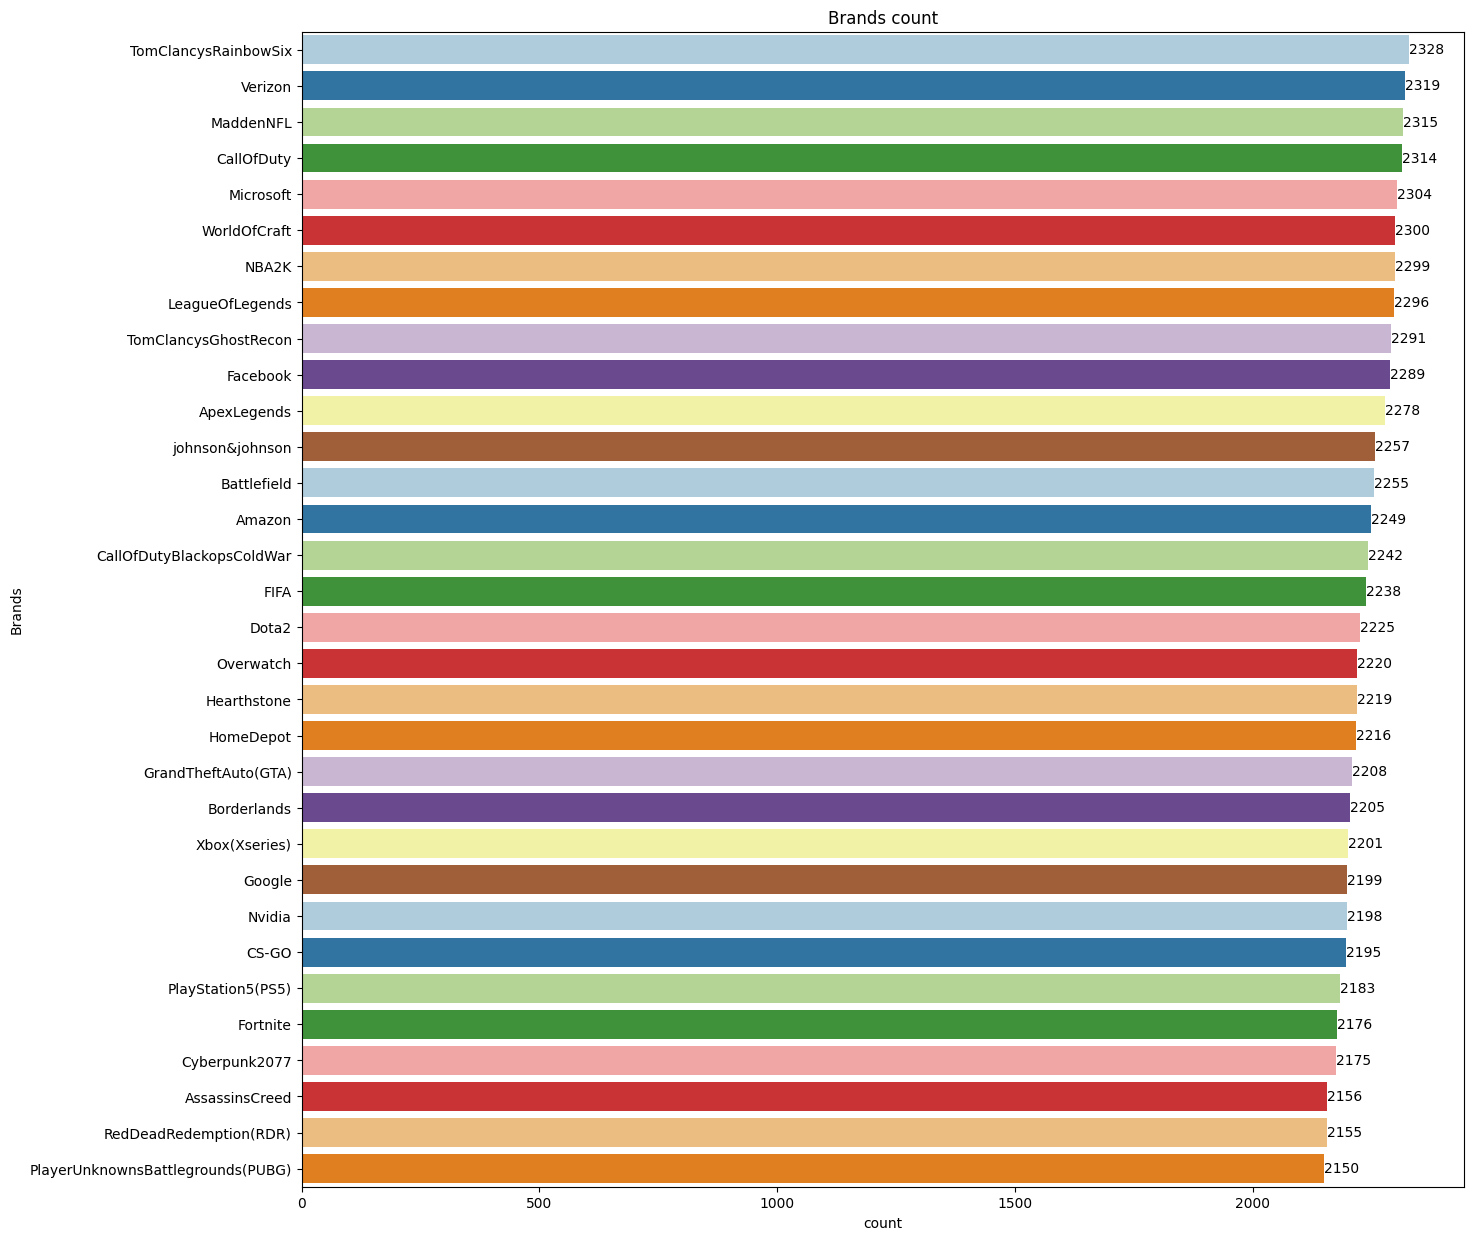

In [16]:
plt.figure(figsize=(15,15))
ax = sns.countplot(y="Brands", data=data, order=data["Brands"].value_counts(ascending=False).index, palette="Paired")
for i in ax.containers:
    ax.bar_label(i)
plt.title("Brands count")
plt.show()

Sentiment Distribution

C:\Users\91879\AppData\Local\Temp\ipykernel_9940\3768072076.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Sentiment", data=data, palette="deep")


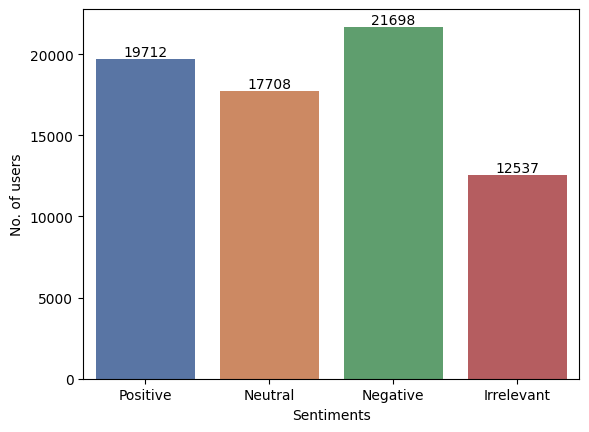

In [19]:
ax = sns.countplot(x="Sentiment", data=data, palette="deep")
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel("Sentiments")
plt.ylabel("No. of users")
plt.show()

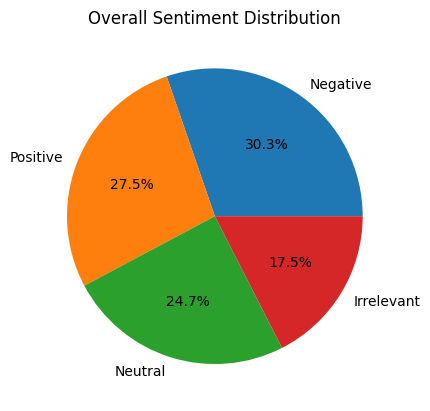

In [118]:
senti_count = data["Sentiment"].value_counts()
plt.pie(senti_count, labels=senti_count.index, autopct="%1.1f%%")
plt.title("Overall Sentiment Distribution")
plt.show()

Brand-wise Distribution

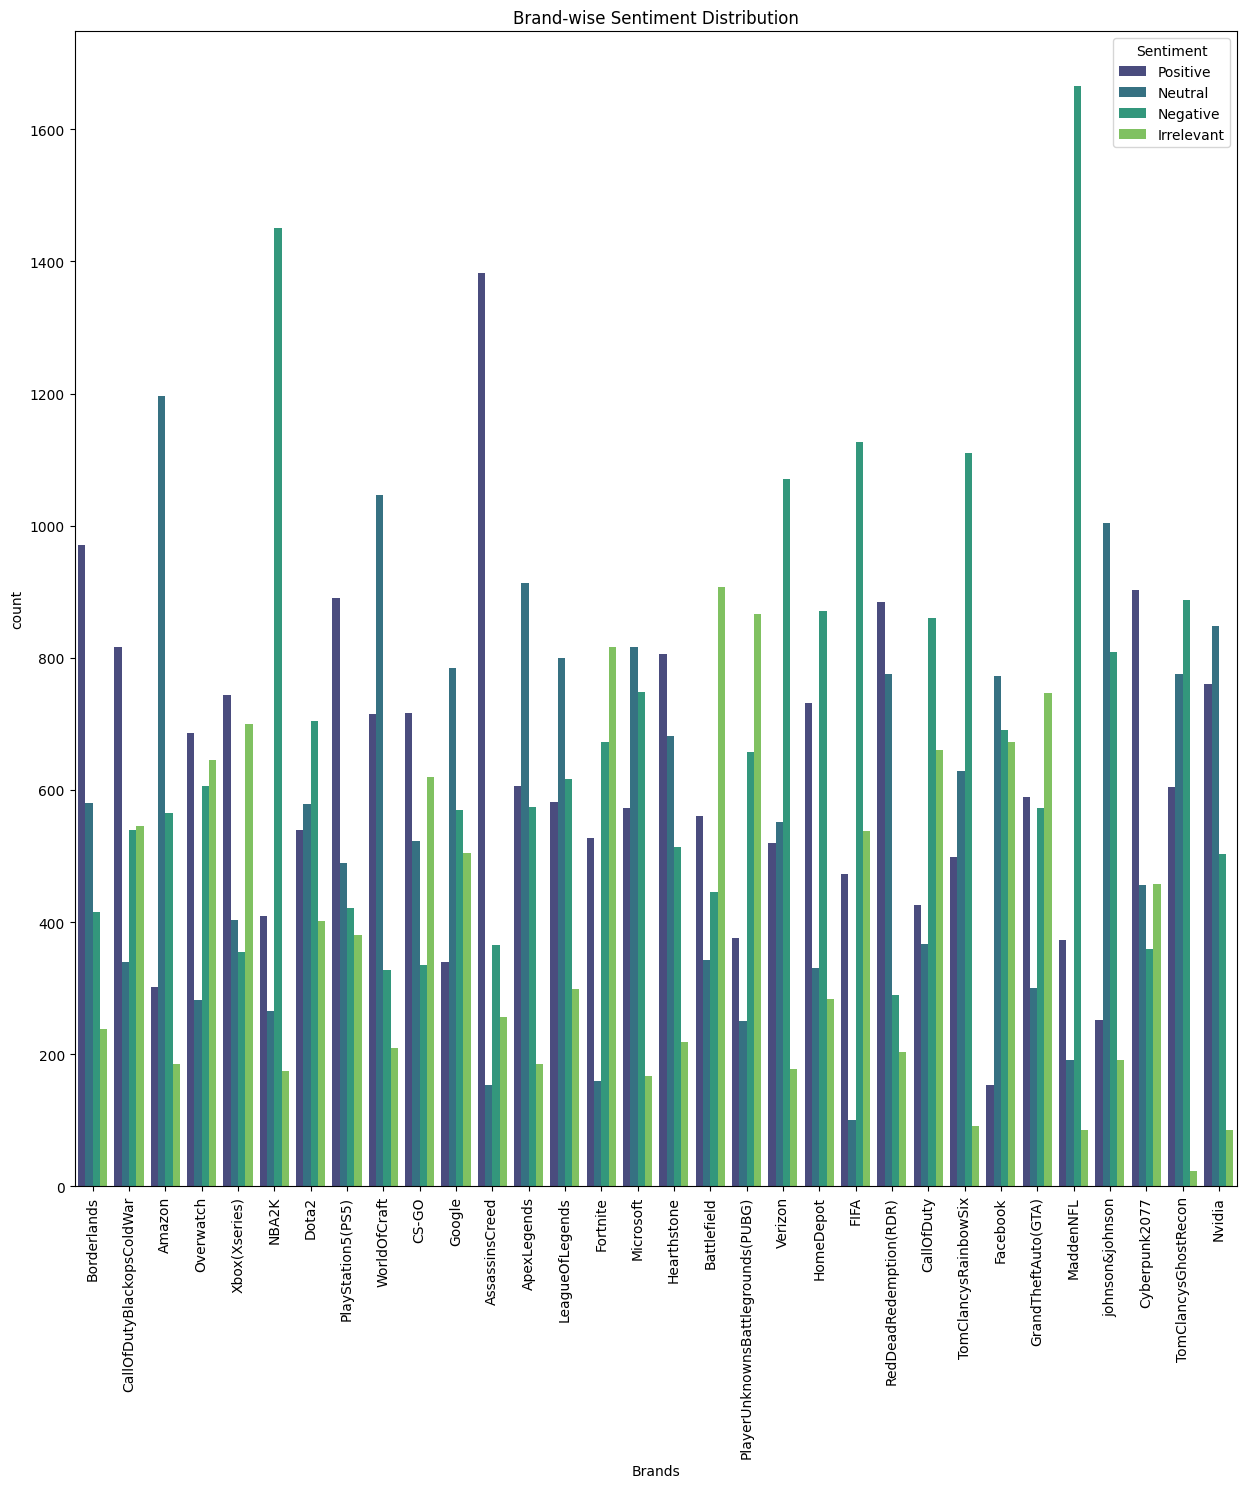

In [119]:
plt.figure(figsize=(15,15))
sns.countplot(x="Brands", data=data, hue="Sentiment", palette="viridis")
plt.xticks(rotation=90)
plt.title("Brand-wise Sentiment Distribution")
plt.show()


Top 10 brand with negative sentiments

In [58]:
brand_wise_sentiment = data.groupby(["Brands", "Sentiment"]).size().reset_index(name='Count')
brand_count = data["Brands"].value_counts().nlargest(7).index
# brand_count
top_brand_sentiment = brand_wise_sentiment[brand_wise_sentiment['Brands'].isin(brand_count)]

C:\Users\91879\AppData\Local\Temp\ipykernel_9940\133808676.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_brand_sentiment[top_brand_sentiment['Sentiment'] == 'Negative'], x='Brands', y='Count', palette='viridis')


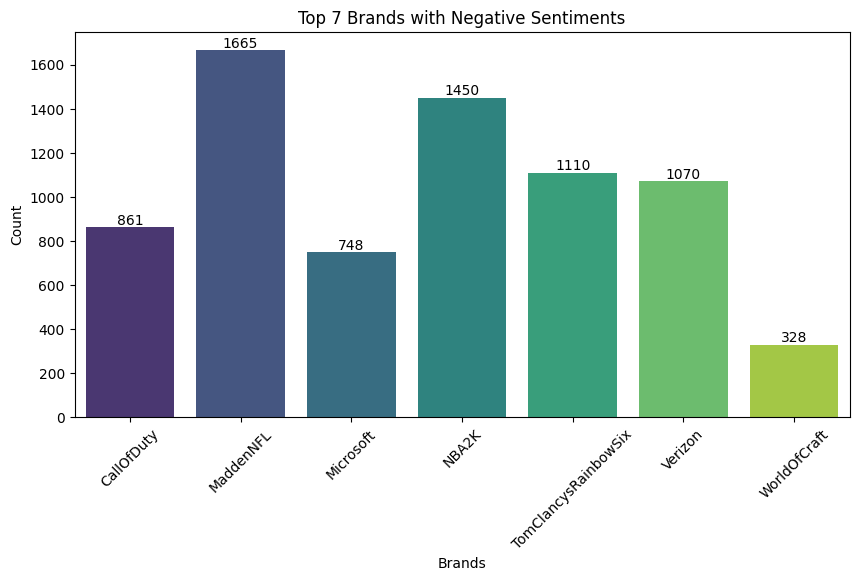

In [62]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=top_brand_sentiment[top_brand_sentiment['Sentiment'] == 'Negative'], x='Brands', y='Count', palette='viridis')
for i in ax.containers:
    ax.bar_label(i)
plt.title('Top 7 Brands with Negative Sentiments')
plt.xlabel('Brands')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

C:\Users\91879\AppData\Local\Temp\ipykernel_9940\2857940292.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_brand_sentiment[top_brand_sentiment['Sentiment'] == 'Positive'], x='Brands', y='Count', palette='viridis')


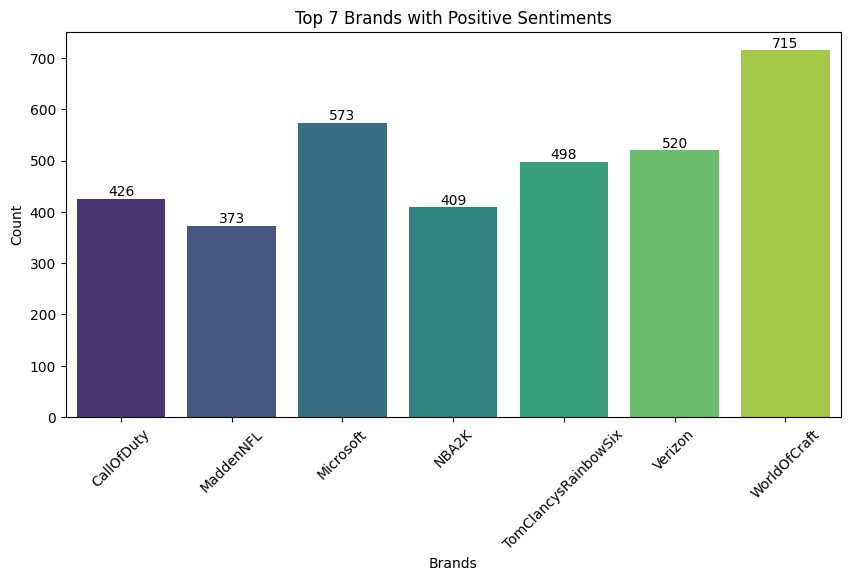

In [63]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=top_brand_sentiment[top_brand_sentiment['Sentiment'] == 'Positive'], x='Brands', y='Count', palette='viridis')
for i in ax.containers:
    ax.bar_label(i)
plt.title('Top 7 Brands with Positive Sentiments')
plt.xlabel('Brands')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

C:\Users\91879\AppData\Local\Temp\ipykernel_9940\3069915470.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_brand_sentiment[top_brand_sentiment['Sentiment'] == 'Neutral'], x='Brands', y='Count', palette='Greys')


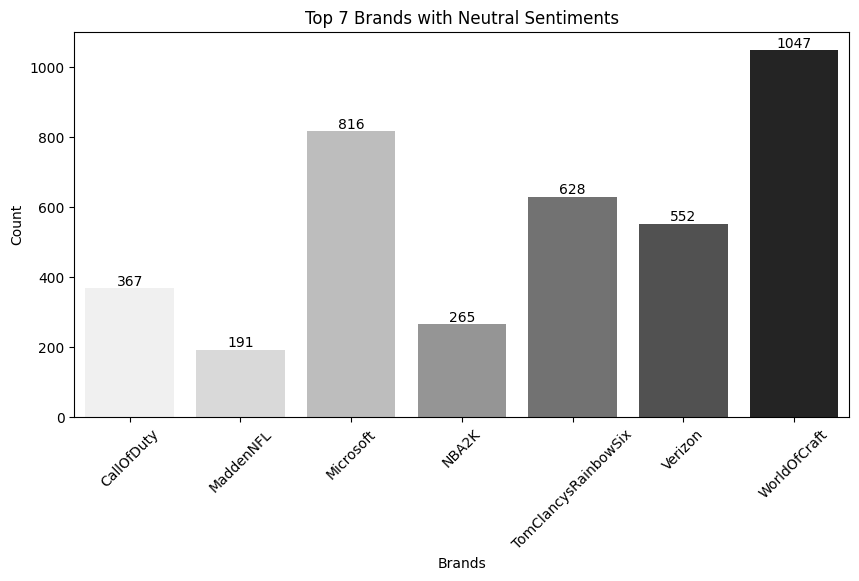

In [72]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=top_brand_sentiment[top_brand_sentiment['Sentiment'] == 'Neutral'], x='Brands', y='Count', palette='Greys')
for i in ax.containers:
    ax.bar_label(i)
plt.title('Top 7 Brands with Neutral Sentiments')
plt.xlabel('Brands')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

C:\Users\91879\AppData\Local\Temp\ipykernel_9940\4246429779.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_brand_sentiment[top_brand_sentiment['Sentiment'] == 'Irrelevant'], x='Brands', y='Count', palette='Blues')


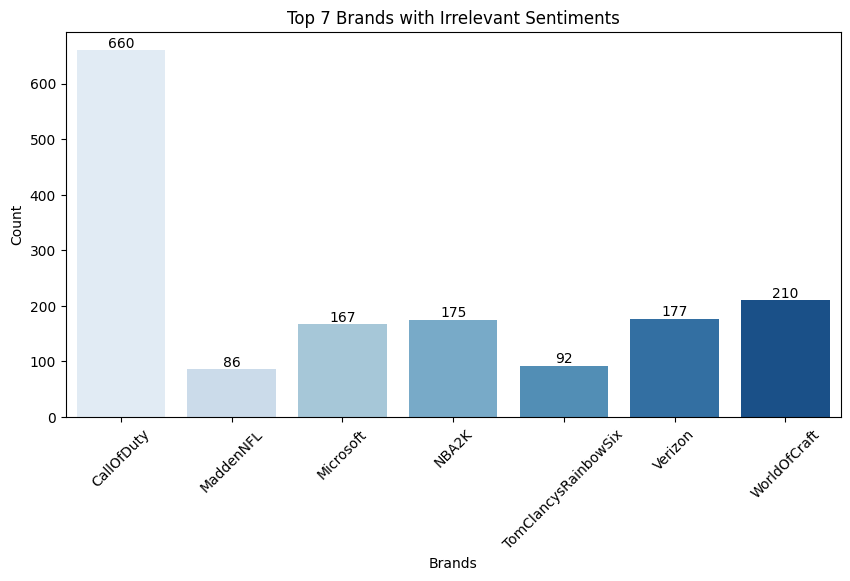

In [120]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=top_brand_sentiment[top_brand_sentiment['Sentiment'] == 'Irrelevant'], x='Brands', y='Count', palette='Blues')
for i in ax.containers:
    ax.bar_label(i)
plt.title('Top 7 Brands with Irrelevant Sentiments')
plt.xlabel('Brands')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Sentiment Distribution for world of craft

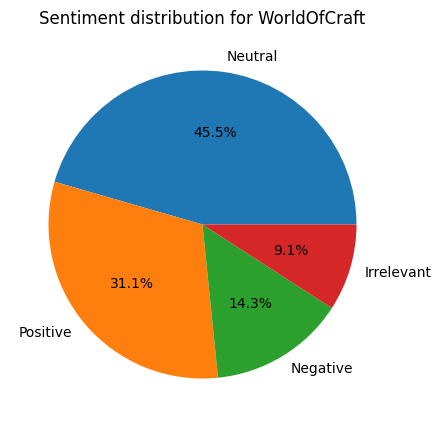

In [115]:
plt.figure(figsize=(5,5))
woc = data[data["Brands"] == "WorldOfCraft"]
senti_count = woc["Sentiment"].value_counts()
# senti_count

plt.pie(senti_count, labels=senti_count.index, autopct="%1.1f%%")
plt.title("Sentiment distribution for WorldOfCraft")
plt.show()

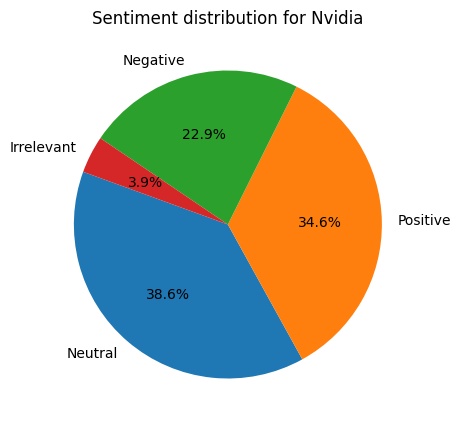

In [116]:
plt.figure(figsize=(5,5))

nvidia = data[data["Brands"] == "Nvidia"]
senti_count = nvidia["Sentiment"].value_counts()

plt.pie(senti_count, labels=senti_count.index, autopct="%1.1f%%", startangle=160)
plt.title("Sentiment distribution for Nvidia")
plt.show()

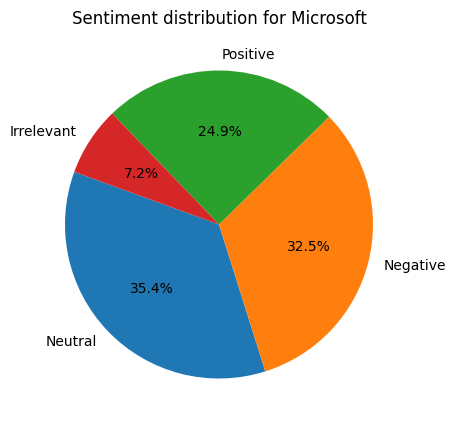

In [117]:
plt.figure(figsize=(5,5))

microsoft = data[data["Brands"] == "Microsoft"]
senti_count = microsoft["Sentiment"].value_counts()

plt.pie(senti_count, labels=senti_count.index, autopct="%1.1f%%", startangle=160)
plt.title("Sentiment distribution for Microsoft")
plt.show()

In [94]:
data["Msg_len"] = data["Comments"].apply(len)
data

,ID,Brands,Sentiment,Comments,Msg_len
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,53
...,...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...,128
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,117
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,125
74679,9200,Nvidia,Positive,Just realized between the windows partition of...,159


C:\Users\91879\AppData\Local\Temp\ipykernel_9940\1652964490.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=data['Sentiment'], y='Msg_len', palette='deep', order=['Positive', 'Negative', 'Neutral', 'Irrelevant'])


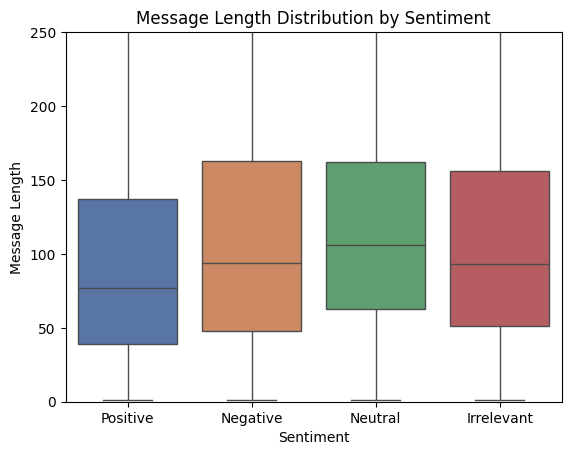

In [103]:
sns.boxplot(data=data, x=data['Sentiment'], y='Msg_len', palette='deep', order=['Positive', 'Negative', 'Neutral', 'Irrelevant'])
plt.title('Message Length Distribution by Sentiment')
plt.ylabel('Message Length')
plt.xlabel('Sentiment')
plt.ylim(0,250)
plt.show()  


# Conclusion

In [111]:
# 1. Sentiment - Large number of Sentiment are Negative
# 2. Most Negative sentiment is for MaddenNFL which is 1667.
# 3. Most Positive sentiment is for WorldOfCraft which is 715.
# 4. Most Irrelevant sentiment is for CallOfDuty.
# 5. Brands like Microsoft, CallOfDuty, Verizon lies in Top 7 Positive sentiment.